# Banking Data Exploratory Data Analysis

**Author: Andrés Nó Gómez**


### 0.1 Imports

REQUIREMENTS:
+ Pandas
+ Numpy
+ matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0.2 Auxiliary Functions / Dictionaries

In [2]:
# Function that receives a dataframe and lists of column names as arguments.
# Converts these columns to the specified data type. For dates, they are formatted.

def define_data_types(df, integer_columns, float_columns, categorical_columns, boolean_columns, date_columns): 
    for col in integer_columns:
        # In some cases, they came with decimals although it doesn't make logical sense. We round them before converting to integer
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce').round()
        df[col] = df[col].astype('Int64')

    for col in float_columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce').astype('Float64')

    for col in categorical_columns:
        df[col] = df[col].astype('category')
        
    for col in boolean_columns:
        df[col] = df[col].apply(lambda x: True if x == 1 else (False if x == 0 else np.nan)).astype('boolean')

    for col in date_columns:
        # Replace months with numbers
        df[col] = df[col].astype(str)
        for month, num in months_dict.items():
            df[col] = df[col].str.replace(month, num, case=False, regex=False)
        # Convert to date type
        df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce')

# Dictionary to map months to numbers
months_dict = {
    'january': '01', 'february': '02', 'march': '03', 'april': '04',
    'may': '05', 'june': '06', 'july': '07', 'august': '08',
    'september': '09', 'october': '10', 'november': '11', 'december': '12'
}

## 1. General Data Understanding

In this section we will explore the basic structure and characteristics of our datasets, identifying variable types and dimensions to establish the foundation for subsequent analysis.

We load the customer contact records from marketing campaigns into a Pandas DataFrame

In [3]:
df_contacts = pd.read_csv('Dataset/bank-additional.csv', sep=',', header=0, index_col=0)
print('Contact DataFrame dimensions:', df_contacts.shape)
df_contacts.head()


Contact DataFrame dimensions: (43000, 23)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In a single DataFrame, we concatenate the 3 data sheets about bank customers who joined in the years 2012, 2013, 2014

In [4]:
df_customers = pd.read_excel('Dataset/customer-details.xlsx', sheet_name=None, index_col=0)  # Load all sheets
df_customers = pd.concat(df_customers.values(), ignore_index=True)
print('Customer DataFrame dimensions:', df_customers.shape)
df_customers.head()

Customer DataFrame dimensions: (43170, 6)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### 1.2 Variable Identification

#### 1.2.1 Contacts Dataframe

In [5]:
for col, dtype in df_contacts.dtypes.items():
    print(f"Column: {col} | Data type: {dtype}")

Column: age | Data type: float64
Column: job | Data type: object
Column: marital | Data type: object
Column: education | Data type: object
Column: default | Data type: float64
Column: housing | Data type: float64
Column: loan | Data type: float64
Column: contact | Data type: object
Column: duration | Data type: int64
Column: campaign | Data type: int64
Column: pdays | Data type: int64
Column: previous | Data type: int64
Column: poutcome | Data type: object
Column: emp.var.rate | Data type: float64
Column: cons.price.idx | Data type: object
Column: cons.conf.idx | Data type: object
Column: euribor3m | Data type: object
Column: nr.employed | Data type: object
Column: y | Data type: object
Column: date | Data type: object
Column: latitude | Data type: float64
Column: longitude | Data type: float64
Column: id_ | Data type: object


##### Definition of appropriate data type in the contacts dataframe:

In [6]:
# Identify columns by data type
integer_columns = ['age','duration','campaign','pdays', 'previous', 'nr.employed','latitude', 'longitude']
float_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
categorical_columns = ['job', 'marital', 'education','contact', 'poutcome']
boolean_columns = ['default', 'housing', 'loan']
date_columns = ['date']

# Perform data type conversion
define_data_types(df_contacts, integer_columns, float_columns, categorical_columns, boolean_columns, date_columns)
df_contacts['y'] = df_contacts['y'].apply(lambda x: True if x == 'yes' else (False if x == 'no' else np.nan)).astype('boolean')
boolean_columns.append('y')

# Verify data types
for col, dtype in df_contacts.dtypes.items():
    print(f"Column: {col} | Data type: {dtype}")

Column: age | Data type: Int64
Column: job | Data type: category
Column: marital | Data type: category
Column: education | Data type: category
Column: default | Data type: boolean
Column: housing | Data type: boolean
Column: loan | Data type: boolean
Column: contact | Data type: category
Column: duration | Data type: Int64
Column: campaign | Data type: Int64
Column: pdays | Data type: Int64
Column: previous | Data type: Int64
Column: poutcome | Data type: category
Column: emp.var.rate | Data type: Float64
Column: cons.price.idx | Data type: Float64
Column: cons.conf.idx | Data type: Float64
Column: euribor3m | Data type: Float64
Column: nr.employed | Data type: Int64
Column: y | Data type: boolean
Column: date | Data type: datetime64[ns]
Column: latitude | Data type: Int64
Column: longitude | Data type: Int64
Column: id_ | Data type: object


#### 1.2.2 Customers Dataframe

In [7]:
for col, dtype in df_customers.dtypes.items():
    print(f"Column: {col} | Data type: {dtype}")

Column: Income | Data type: int64
Column: Kidhome | Data type: int64
Column: Teenhome | Data type: int64
Column: Dt_Customer | Data type: datetime64[ns]
Column: NumWebVisitsMonth | Data type: int64
Column: ID | Data type: object


The data types have already been correctly established by default in this dataframe, we don't need to modify anything.

## 2. Data Transformation and Cleaning

In this section we prepare the data for analysis by identifying and treating duplicates, missing values and anomalies that may affect the quality of subsequent analysis.


### 2.1 Duplicate Values and ID Understanding


In [8]:
print("Duplicates in contacts:", df_contacts['id_'].duplicated().sum())
print("Duplicates in customers:", df_customers['ID'].duplicated().sum())

# Review IDs that are not in the other dataset
ids_contacts = set(df_contacts['id_'])
ids_customers = set(df_customers['ID'])

print("IDs in contacts not in customers:", len(ids_contacts - ids_customers))
print("IDs in customers not in contacts:", len(ids_customers - ids_contacts))

Duplicates in contacts: 0
Duplicates in customers: 0
IDs in contacts not in customers: 0
IDs in customers not in contacts: 170


+ There are no duplicate rows (nor IDs), neither in the Contacts nor in the Customers dataframe.
+ All IDs of the contacted customers in the dataset correspond to IDs of bank customers who joined between 2012 and 2014.
+ There are 170 customers who joined between 2012 and 2014 who were not contacted in any campaign.

### 2.2 Missing Values

#### 2.2.1 Contacts Dataframe

In [9]:
df_contacts.isnull().sum()

age                5120
job                 345
marital              85
education          1807
default            8981
housing            1026
loan               1026
contact               0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx      471
cons.conf.idx         0
euribor3m          9256
nr.employed           0
y                     0
date              43000
latitude              0
longitude             0
id_                   0
dtype: int64

+ Missing values are found in several columns. In most of these columns, the number of missing records is not too concerning (less than 5% of the total number of records in 'job', 'marital', 'education', 'housing', 'loan', cons.price.idx, 'date'). 

+ However, in the columns 'age', 'default' and 'euribor3m', between 11% and 21% of records are missing, which is more concerning. 

##### Study of correlations between missing values

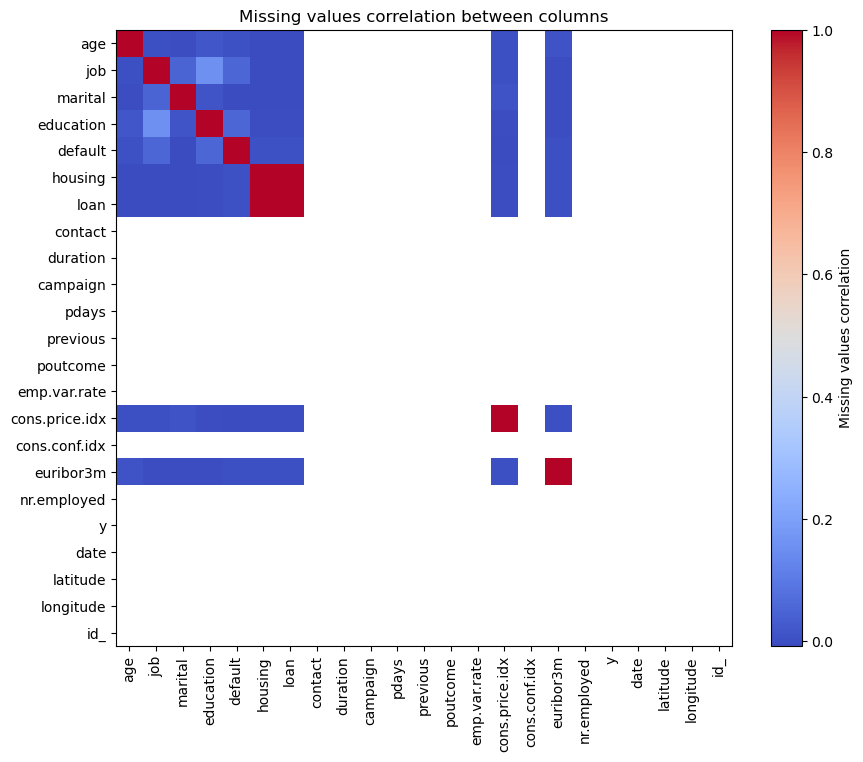

Correlation between missing 'job' and 'education': 0.15655874054313623
Correlation between missing 'loan' and 'housing': 1.0


In [10]:
missing_corr = df_contacts.isnull().corr()

plt.figure(figsize=(10,8))
plt.imshow(missing_corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Missing values correlation')
plt.xticks(range(len(missing_corr)), missing_corr.columns, rotation=90)
plt.yticks(range(len(missing_corr)), missing_corr.columns)
plt.title("Missing values correlation between columns")
plt.show()

print("Correlation between missing 'job' and 'education':", missing_corr.loc['job', 'education'])
print("Correlation between missing 'loan' and 'housing':", missing_corr.loc['loan', 'housing'])

+ The only pattern we have detected with sufficient evidence is the 1-to-1 correspondence of missing values in the 'loan' and 'housing' columns. Both refer to whether the customer receives loans. 

#### Missing values management.



+ For categorical or boolean columns, we choose to add a new 'unknown' category because the very lack of record can be significant, especially in the columns 'default' (payment default history), 'housing' or 'loan' (loan indicator).

+ For numerical columns, we will impute values with the column median, which is more robust to outliers than the mean and allows us to maintain a similar data distribution without losing records.

+ For the last contact date column, we will remove rows that don't have an associated date, due to the difficulty of imputing a coherent value and because with few cases we don't lose too much information.

In [11]:
# Impute 'unknown' in categoricals
for col in categorical_columns:
    df_contacts[col] = df_contacts[col].cat.add_categories('unknown')
    df_contacts[col] = df_contacts[col].fillna('unknown')

# Impute 'unknown' in booleans
for col in boolean_columns:
    df_contacts[col] = df_contacts[col].astype('object').where(df_contacts[col].notnull(), 'unknown')
    df_contacts[col] = df_contacts[col].astype('category')

# Impute median in numericals
for col in integer_columns + float_columns:
    median_val = df_contacts[col].median()
    df_contacts[col] = df_contacts[col].fillna(median_val)

# Remove rows with missing dates
df_contacts = df_contacts.dropna(subset=['date'])

We verify that no missing values remain in our DataFrame

In [12]:
df_contacts.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
date              0
latitude          0
longitude         0
id_               0
dtype: int64

#### 2.2.2 Customers dataframe


In [13]:
df_customers.isnull().sum()

Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In this DataFrame, there are no missing values.

### 2.3 Inconsistencies

#### 2.3.1 Columns without relevant information

##### Days since previous contact ('pdays')

In [14]:
df_contacts['pdays'].value_counts()
print(f'The value 999 is in {df_contacts["pdays"].value_counts(normalize=True).get(999, 0) * 100:.2f}% of total records.')

The value 999 is in 0.00% of total records.


+ We don't know if the value 999 has been recorded all those times by error, or if it has some meaning. Therefore, we decide to remove the column since it is not providing us with relevant information.

In [15]:
df_contacts = df_contacts.drop(columns=['pdays'])
integer_columns.remove('pdays')

#### 2.3.2 Anomalous Data



Boxplots of numerical variables:


Boxplots of numerical variables:


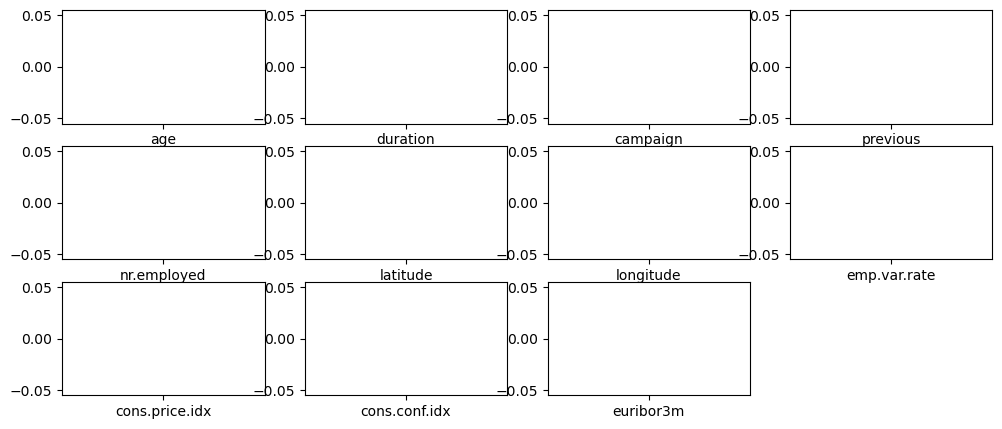

Boxplots of numerical variables:


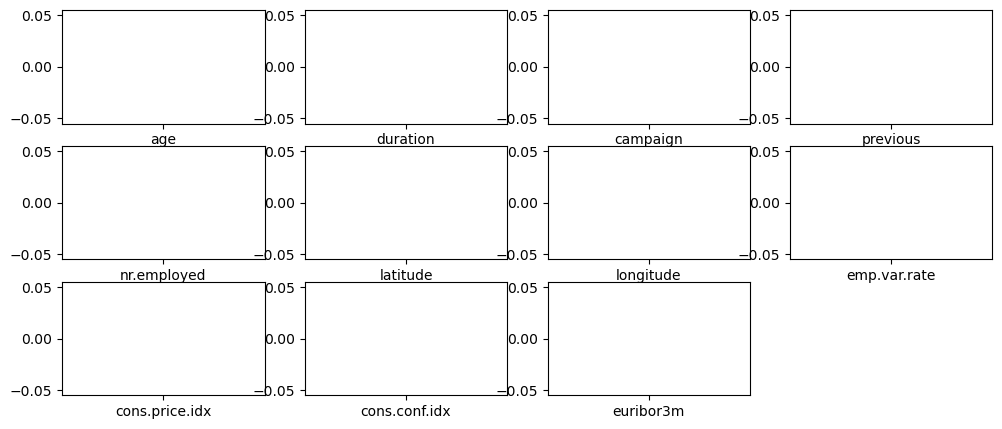

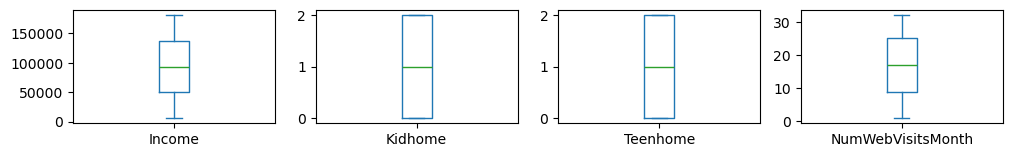

In [16]:
print('Boxplots of numerical variables:')
_ = df_contacts[integer_columns + float_columns].plot(kind='box', subplots=True, figsize=(12,5), layout=(3,4))
_ = df_customers.plot(kind='box', subplots=True, figsize=(12,5), layout=(3,4))


+ The columns 'age', 'duration', 'campaign', 'previous', 'cons.conf.idx' will be analyzed in more detail because they have values that are below Q1 - 1.5×IQR or above Q3 + 1.5×IQR (marked in black circles in the boxplots). 

In [17]:
# Descriptive statistics of columns with outliers
print('Descriptive statistics of columns with outliers:')
columns = ['age', 'duration', 'campaign', 'previous', 'cons.conf.idx']
df_contacts[columns].describe(include='all')

Descriptive statistics of columns with outliers:


,age,duration,campaign,previous,cons.conf.idx
count,0.0,0.0,0.0,0.0,0.0
mean,<NA>,<NA>,<NA>,<NA>,<NA>
std,<NA>,<NA>,<NA>,<NA>,<NA>
min,<NA>,<NA>,<NA>,<NA>,<NA>
25%,<NA>,<NA>,<NA>,<NA>,<NA>
50%,<NA>,<NA>,<NA>,<NA>,<NA>
75%,<NA>,<NA>,<NA>,<NA>,<NA>
max,<NA>,<NA>,<NA>,<NA>,<NA>


Visualization of the distribution of variables with outliers:


Visualization of the distribution of variables with outliers:


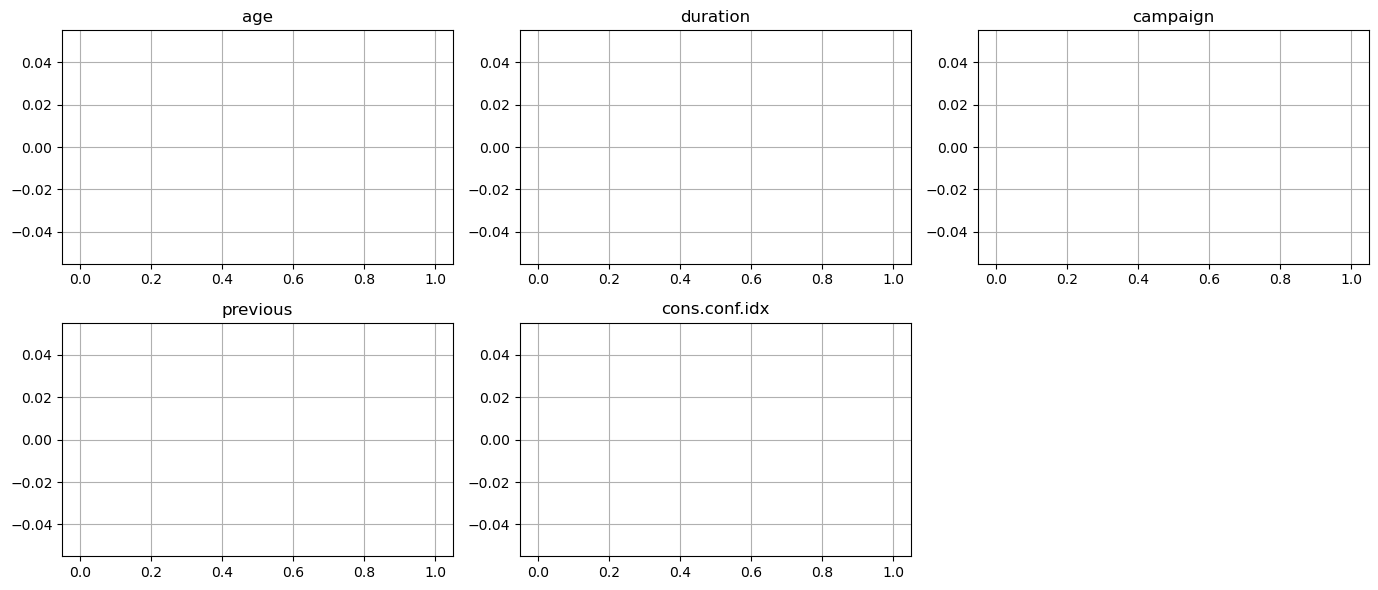

In [18]:
# Visualization of the distribution of the mentioned variables
print ('Visualization of the distribution of variables with outliers:')

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
for i, col in enumerate(columns):
    df_contacts[col].hist(ax=axes.flat[i], bins=30)
    axes.flat[i].set_title(col)
plt.tight_layout()
# Remove the last empty axis from the subplot grid
fig.delaxes(axes.flat[-1])
plt.show()

+ **age**: Despite the presence of outliers, it has been decided to keep them, as they represent customer ages that, although extreme, are demographically possible and could be relevant for the analysis.

+ **duration**: Records where the call duration exceeds 1500 seconds (25 minutes) have been removed. This decision is based on the fact that such prolonged durations are unrealistic in the context of a telemarketing campaign and significantly distort statistical metrics, such as the mean.

+ **campaign**: Records with more than 15 contacts during the current campaign have been excluded. Such a high number of interactions with the same customer is considered anomalous and could indicate an error in data recording or atypical behavior that is not representative of the rest of the sample.

+ **previous**: No modifications have been made to this column. Although outliers exist, they reflect a contact history with customers that, while extensive, is plausible and may contain valuable information about the customer's relationship with the bank.

+ **cons.conf.idx**: The values in this column have been kept unchanged. The observed outliers are within a range that can be considered reasonable for a consumer confidence index.

In [19]:
# Outlier management

# Initial record count
initial_rows = len(df_contacts)
print(f"Initial number of records: {initial_rows}")

# Management of 'duration'
duration_outliers = df_contacts[df_contacts['duration'] > 1500]
n_duration_outliers = len(duration_outliers)
df_contacts = df_contacts[df_contacts['duration'] <= 1500]
print(f"Records removed for 'duration' > 1500: {n_duration_outliers}")

# Management of 'campaign'
campaign_outliers = df_contacts[df_contacts['campaign'] > 15]
n_campaign_outliers = len(campaign_outliers)
df_contacts = df_contacts[df_contacts['campaign'] <= 15]
print(f"Records removed for 'campaign' > 15: {n_campaign_outliers}")

# Final count
final_rows = len(df_contacts)
print(f"Final number of records: {final_rows}")
print(f"Total records removed: {initial_rows - final_rows}")

Initial number of records: 0
Records removed for 'duration' > 1500: 0
Records removed for 'campaign' > 15: 0
Final number of records: 0
Total records removed: 0


### Saving final datasets to csv files.

In [20]:
# Save df_customers
df_customers.to_csv('Clean_dataset/customers.csv', index=False)

# Save df_contacts
df_contacts.to_csv('Clean_dataset/contacts.csv', index=False)

## 3. Descriptive Analysis

In this section we explore the statistical characteristics and distributions of variables in our clean datasets. Descriptive analysis allows us to understand the nature of the data through measures of central tendency, dispersion and distribution visualizations, providing the foundation for interpretations and subsequent analysis.


In [21]:
# # Read the final dataframes from csv files
# df_customers = pd.read_csv('Clean_dataset/customers.csv')
# df_contacts = pd.read_csv('Clean_dataset/contacts.csv')

### 3.1 Descriptive Statistics Metrics

#### 3.1.1 Contacts Dataframe

In [22]:
pd.set_option('display.float_format', '{:.2f}'.format) # To fix 2 decimals in the following tables
print("Summary of numerical and date columns:")
df_contacts.describe(percentiles=[0.5])

Summary of numerical and date columns:


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,date,latitude,longitude
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
mean,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,<NA>
min,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,<NA>
50%,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,<NA>
max,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,<NA>
std,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>


In [23]:
# Descriptive statistics for categorical and boolean columns
print("Summary of categorical columns:\n")
for col in categorical_columns:
    print(f"Categories in '{col}': {df_contacts[col].cat.categories.tolist()}\n")
df_contacts[categorical_columns + boolean_columns].describe()

Summary of categorical columns:

Categories in 'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']

Categories in 'marital': ['DIVORCED', 'MARRIED', 'SINGLE', 'unknown']

Categories in 'education': ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']

Categories in 'contact': ['cellular', 'telephone', 'unknown']

Categories in 'poutcome': ['FAILURE', 'NONEXISTENT', 'SUCCESS', 'unknown']



,job,marital,education,contact,poutcome,default,housing,loan,y
count,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.1.2 Customers Dataframe

In [24]:
df_customers.describe(percentiles=[0.5])

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
count,43170.00,43170.00,43170.00,43170,43170.00
mean,93227.39,1.00,1.00,2013-05-11 22:09:47.407922176,16.59
min,5841.00,0.00,0.00,2012-01-01 00:00:00,1.00
50%,93009.50,1.00,1.00,2013-03-01 00:00:00,17.00
max,180802.00,2.00,2.00,2014-12-31 00:00:00,32.00
std,50498.18,0.82,0.82,NaN,9.24


### 3.2 Variable Distribution: Contacts Dataframe

IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0

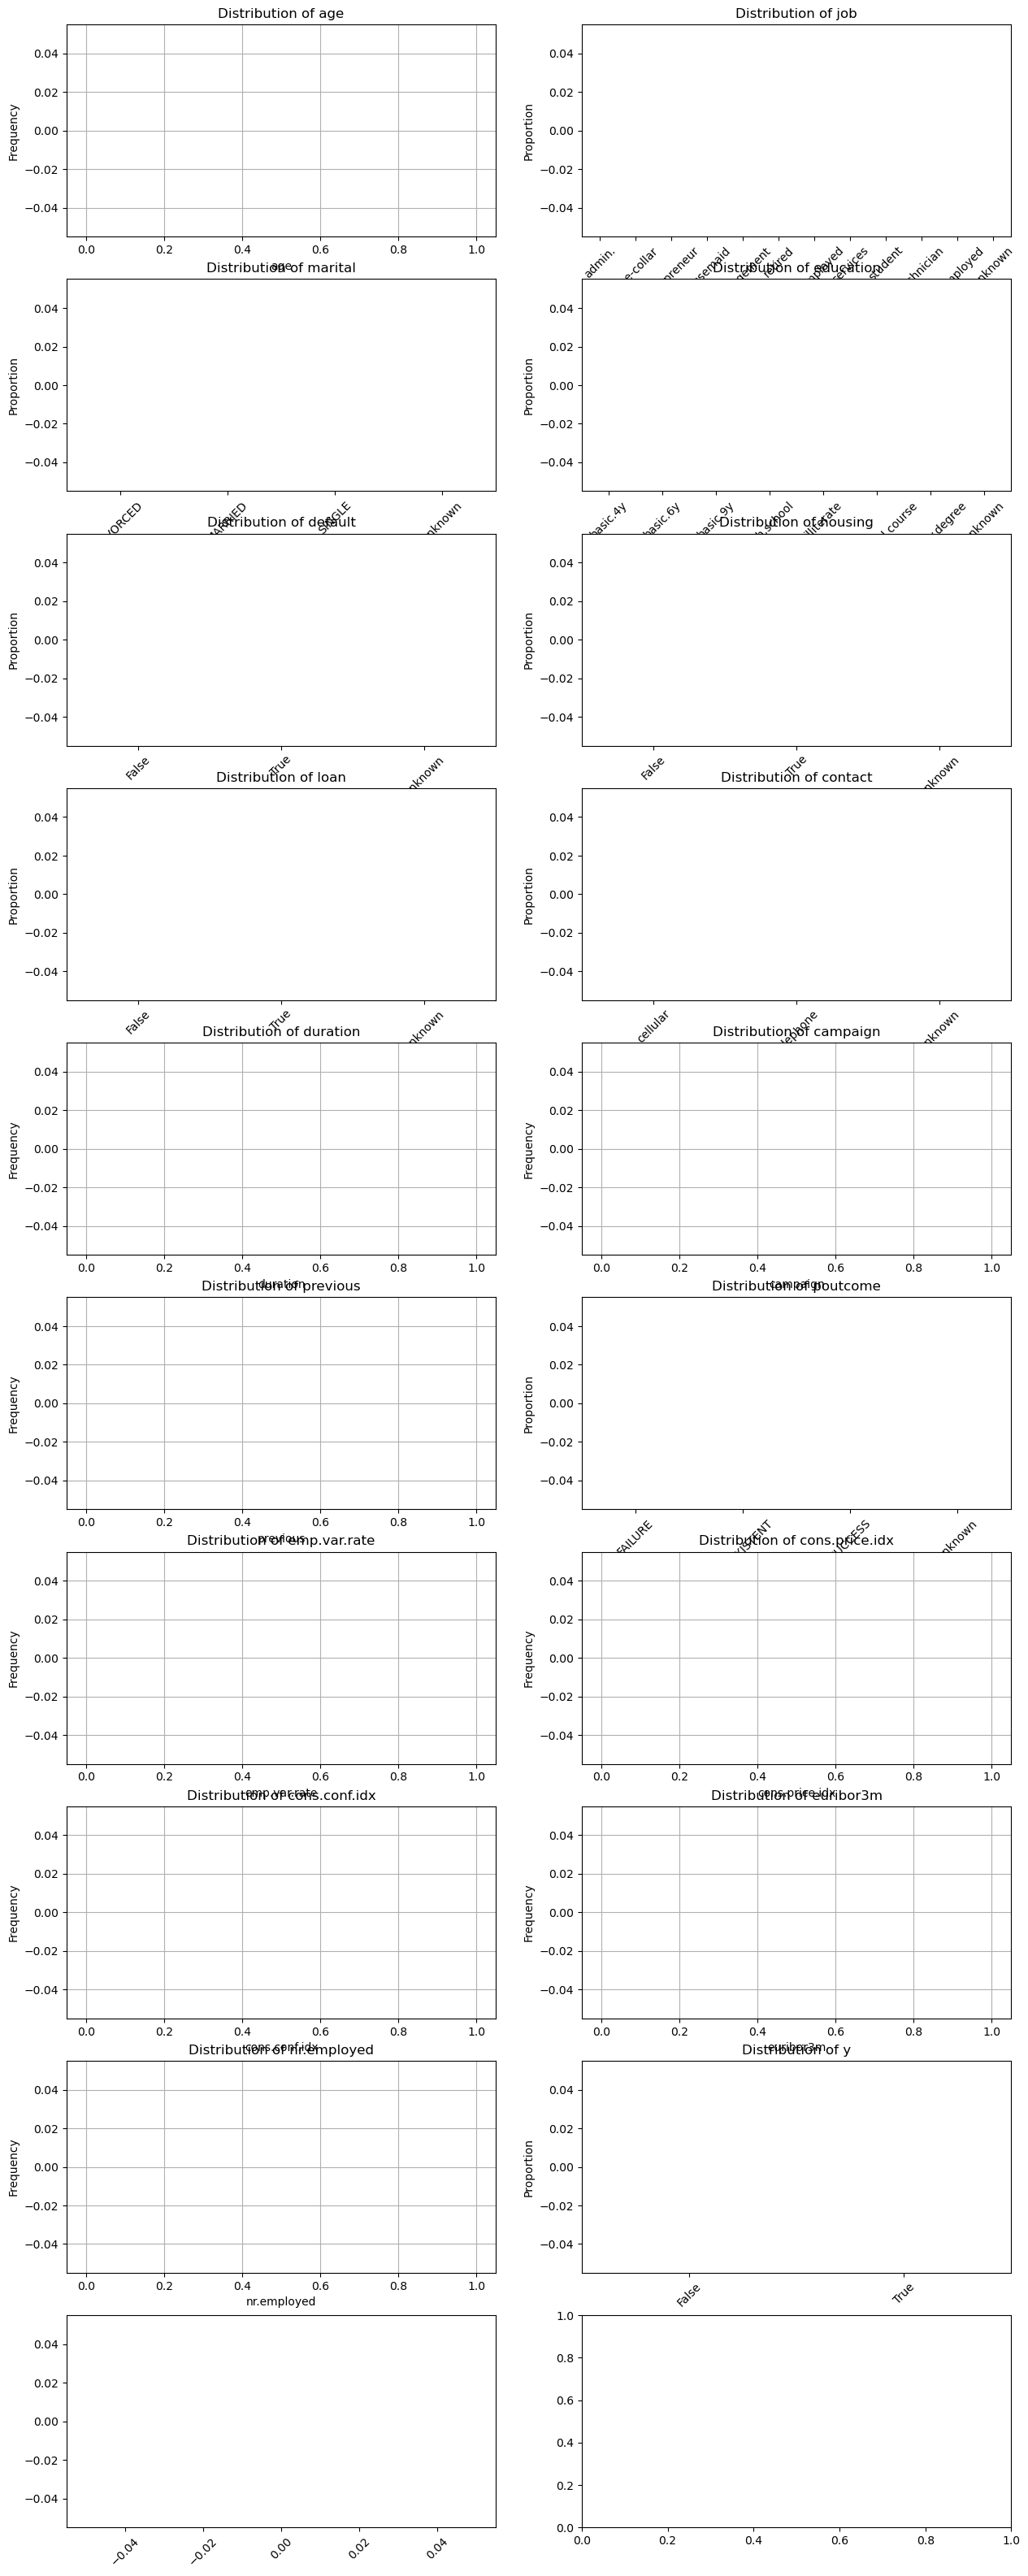

In [25]:

# List of columns to visualize (excluding 'id_', 'latitude', 'longitude')
cols_to_plot = [col for col in df_contacts.columns if col not in ['id_', 'latitude', 'longitude']]

# Ensure date column is datetime type
df_contacts['date'] = pd.to_datetime(df_contacts['date'])

# Define numerical and categorical columns for plotting logic
numeric_cols = df_contacts.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_contacts.select_dtypes(include=['category', 'object', 'boolean']).columns.tolist()
date_cols = ['date']

# Create a figure and set of subplots
# Calculate number of rows needed for a 2-column grid
n_cols = 2
n_rows = 10
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    
    if col in numeric_cols:
        df_contacts[col].hist(ax=ax, bins=30)
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    elif col in categorical_cols:
        # For categoricals, use bar plot
        data = df_contacts[col].value_counts(normalize=True)
        data.plot(kind='bar', ax=ax, rot=45)
        ax.set_title(f'Distribution of {col}')
        ax.set_ylabel('Proportion')
        # Add percentage labels
        for index, value in enumerate(data):
            ax.text(index, value, f'{value*100:.1f}%', ha='center', va='bottom')
            
    elif col in date_cols:
        # For dates, quarterly bar chart
        quarterly_counts = df_contacts[col].dt.to_period('Q').value_counts().sort_index()
        # Format index to be "YYYY QX"
        quarterly_counts.index = quarterly_counts.index.strftime('%Y Q%q')
        quarterly_counts.plot(kind='bar', ax=ax, rot=45)
        ax.set_title(f'Distribution of {col} (by quarter)')
        ax.set_ylabel('Number of contacts')

# Hide unused axes
if len(cols_to_plot) < len(axes):
    for j in range(len(cols_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()

### 3.2 Variable Distribution: Customers Dataframe

In [ ]:

# Manually define columns to visualize and their types
cols_to_plot_customers = [col for col in df_customers.columns if col != 'ID']
# Move Kidhome and Teenhome to categoricals for visualization
integer_cols_customers = ['age', 'Income', 'NumWebVisitsMonth']
categorical_cols_customers = ['Kidhome', 'Teenhome']
date_cols_customers = ['Dt_Customer']

# Create figure and subplots
n_cols = 2
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Iterate and plot
for i, col in enumerate(cols_to_plot_customers):
    ax = axes[i]
    
    if col in integer_cols_customers:
        df_customers[col].hist(ax=ax, bins=20)
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    elif col in categorical_cols_customers:
        # Treat as categorical, even if numeric like Kidhome/Teenhome
        data = df_customers[col].value_counts(normalize=True).sort_index()
        data.plot(kind='bar', ax=ax, rot=0)
        ax.set_title(f'Distribution of {col}')
        ax.set_ylabel('Proportion')
        # Add percentage labels
        for index, value in enumerate(data):
            # Use data.index[index] to get the correct x-axis label
            ax.text(index, value, f'{value*100:.1f}%', ha='center', va='bottom')
            
    elif col in date_cols_customers:
        # Quarterly date chart
        quarterly_counts = pd.to_datetime(df_customers[col]).dt.to_period('Q').value_counts().sort_index()
        quarterly_counts.index = quarterly_counts.index.strftime('%Y Q%q')
        quarterly_counts.plot(kind='bar', ax=ax, rot=45)
        ax.set_title(f'Distribution of {col} (by quarter)')
        ax.set_ylabel('Number of customers')

# 4. Hide unused axes
if len(cols_to_plot_customers) < len(axes):
    for j in range(len(cols_to_plot_customers), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()

### Insights

**The most notable characteristics of the descriptive analysis are:**

+ **Conversion rate**: Only 11.1% of contacts result in product subscription, indicating the selective nature of the banking offer and the need to optimize contact strategies.

+ **Occupational concentration**: 22% of contacts correspond to administrative workers, followed by technicians (19%) and services (13%), suggesting a concentration in middle-class sectors that could be a preferential target.

+ **Demographic profile**: The average age of contacts is 40 years with median income of €51,756, representing a mature segment with financial capacity for specialized banking products.

## 4. Correlation Analysis 

### 4.1 DataFrame Merging

To analyze the relationships between marketing variables (df_contacts) and demographic variables (df_customers), we need to merge both DataFrames using customer IDs.

It has been observed previously that all IDs of contacted customers in the dataset correspond to IDs of bank customers who joined between 2012 and 2014. However, there are 170 customers from the original dataset who joined between 2012 and 2014 who were not contacted in any campaign. We will perform an inner join to include only customers that appear in both datasets, on which we will have meaningful values for all variables.

In [ ]:

# # Prepare DataFrames for merging
# # Rename id_ column in df_contacts to match ID in df_customers
df_contacts_clean = df_contacts.rename(columns={'id_': 'ID'})

df_merged = pd.merge(df_contacts_clean, df_customers, on='ID', how='inner')
print(f"df_contacts_clean dimensions: {df_contacts_clean.shape}")
print(f"df_customers dimensions: {df_customers.shape}")
print(f"Merged DataFrame dimensions: {df_merged.shape}")
print(f"Available columns: {list(df_merged.columns)}")
print(f"\nFirst 5 rows of merged DataFrame:")
df_merged.head()

### 4.2 Correlation Matrix using NumPy

Now we will use NumPy to calculate the correlation matrix between all numerical variables. Boolean variables can easily be included in this analysis by encoding them as 0s and 1s instead of False or True. To enable this, we will temporarily remove records where any boolean is 'unknown' for this analysis, as we have seen in the frequency analysis that these are few cases. This will help us identify linear relationships between variables.

In [ ]:
### 4.4 Analysis including Boolean Variables

# Encode boolean variables to 0 and 1 to include them in correlation analysis
df_merged_encoded = df_merged.copy()

# Boolean variables to encode
boolean_vars = ['default', 'housing', 'loan', 'y']

# Remove records with 'unknown' in any boolean variables
for var in boolean_vars:
    if var in df_merged_encoded.columns:
        df_merged_encoded = df_merged_encoded[df_merged_encoded[var] != 'unknown']

# Convert booleans to 0 and 1
for var in boolean_vars:
    if var in df_merged_encoded.columns:
        df_merged_encoded[f'{var}_num'] = df_merged_encoded[var].map({'True': 1, 'False': 0, True: 1, False: 0})

# Select numerical + encoded boolean columns
numeric_and_bool = df_merged.select_dtypes(include=[np.number]).columns.tolist()
boolean_encoded = [f'{var}_num' for var in boolean_vars if var in df_merged_encoded.columns]

all_numeric_cols = numeric_and_bool + boolean_encoded
# Exclude IDs and coordinates
all_numeric_cols = [col for col in all_numeric_cols if col not in ['ID', 'latitude', 'longitude']]

# Create expanded correlation matrix
df_all_numeric = df_merged_encoded[all_numeric_cols]
correlation_matrix_full = np.corrcoef(df_all_numeric.T)

# Visualize expanded correlation matrix
plt.figure(figsize=(12, 10))
im = plt.imshow(correlation_matrix_full, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation')
plt.xticks(range(len(all_numeric_cols)), all_numeric_cols, rotation=90)
plt.yticks(range(len(all_numeric_cols)), all_numeric_cols)
plt.title('Correlation Matrix (Numerical + Boolean)')
plt.tight_layout()
plt.show()

# TOP 10 correlations including booleans
correlations_all = []
for i in range(len(all_numeric_cols)):
    for j in range(i+1, len(all_numeric_cols)):
        correlations_all.append({
            'Variable_1': all_numeric_cols[i],
            'Variable_2': all_numeric_cols[j],
            'Correlation': correlation_matrix_full[i, j]
        })

df_correlations_all = pd.DataFrame(correlations_all)
df_top_10_all = df_correlations_all.reindex(df_correlations_all['Correlation'].abs().sort_values(ascending=False).index).head(10)

print("TOP 10 CORRELATIONS (Including Boolean Variables):")
df_top_10_all

### 4.3 Correlation Interpretation

**Macroeconomic Variables (high positive correlations):**
Macroeconomic variables and employment indices show extremely strong correlations with each other (euribor3m, emp.var.rate, cons.price.idx, cons.conf.idx, nr.employed). This is expected as all these indicators reflect the general state of the economy and tend to move in a coordinated manner during economic cycles.

**Demographic variables (low correlations):**
Correlations between customer demographic variables (age, income, web visits) are weak, indicating that these characteristics are relatively independent of each other.

### 4.4 Relationship Analysis with Target Variable

In this section we evaluate how different independent variables relate to the target variable `y` (product/service subscription):

**1. Correlations with Numerical and Boolean Variables**: We use Pearson correlation coefficients to measure the linear relationship between quantitative variables and the target variable. For this analysis we use a filtered version of the dataset that excludes records with 'unknown' values in boolean variables, allowing their numerical encoding (0/1) and facilitating matrix correlation calculation.

**2. Success Rate Analysis by Categories**: For categorical variables, we calculate and compare success percentages (conversion) of each category against the general rate, identifying customer segments with higher or lower propensity to subscribe to the product.

In [ ]:
# Create bar chart with positive correlations upward and negative downward
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in df_y_correlations['Correlation']]
bars = plt.bar(range(len(df_y_correlations)), df_y_correlations['Correlation'], color=colors, alpha=0.7)

# Customize chart
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.title('Correlations with Target Variable (y)', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(range(len(df_y_correlations)), df_y_correlations['Variable'], rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add correlation values on bars
for i, (bar, value) in enumerate(zip(bars, df_y_correlations['Correlation'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.02),
             f'{value:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

### Insights

**Main conclusions from correlation analysis with the target variable:**

+ **Variables with strongest positive correlation**: `duration` (call duration) shows the highest correlation with campaign success, suggesting that longer calls tend to be more effective.

+ **Economic variables impact negatively**: Macroeconomic variables like `euribor3m`, `emp.var.rate` and `nr.employed` present negative correlations, indicating that in periods of better economic situation, the willingness to subscribe decreases.

+ **Demographic variables have low impact**: Customer age and income show very weak correlations with the target variable, suggesting that demographic profile is not determining for success.

+ **Contact history is relevant**: The number of previous contacts (`previous`) presents a moderate positive correlation, indicating that previously contacted customers have higher probability of success.

### 4.5 Categorical Variables Impact Analysis

To evaluate how categorical variables affect the target variable, we will use several complementary approaches:

In [ ]:
# Success Percentage Analysis (Variable y)

print("SUCCESS PERCENTAGE ANALYSIS FOR TARGET VARIABLE")
print("=" * 60)

# 1. General "yes" percentage in variable y
total_records = len(df_merged)
success_records = len(df_merged[df_merged['y'] == True])
general_success_rate = (success_records / total_records) * 100

print(f"GENERAL SUCCESS PERCENTAGE:")
print(f"Total records: {total_records:,}")
print(f"Success records (y=True): {success_records:,}")
print(f"General success percentage: {general_success_rate:.2f}%")
print()

# 2. "Yes" percentage for each category of categorical variables
print("SUCCESS PERCENTAGE BY CATEGORIES:")
print("-" * 40)

for var in categorical_vars:
    if var in df_merged.columns:
        print(f"\nVariable: {var.upper()}")
        print("-" * 25)
        
        # Calculate percentages by category
        category_stats = []
        for category in df_merged[var].unique():
            if pd.notna(category):  # Avoid NaN values
                subset = df_merged[df_merged[var] == category]
                total_category = len(subset)
                success_category = len(subset[subset['y'] == True])
                success_rate = (success_category / total_category) * 100 if total_category > 0 else 0
                
                category_stats.append({
                    'Category': category,
                    'Total': total_category,
                    'Successes': success_category,
                    'Success_Percentage': success_rate
                })
        
        # Create DataFrame and sort by success percentage (descending)
        df_var = pd.DataFrame(category_stats)
        df_var = df_var.sort_values('Success_Percentage', ascending=False)
        
        # Display DataFrame
        display(df_var)

#### Insights

**The analysis compares success percentages (conversion rate) between different categories of each categorical variable against the 11.08% general success rate, revealing significant patterns:**

+ **JOB**: Students (31.43%) and retirees (25.34%) present success rates much higher than average, while blue-collar workers (6.62%) and services (7.90%) show the lowest conversion rates.

+ **MARITAL**: Single customers (13.82%) significantly outperform married (9.99%) and divorced (10.02%) customers, suggesting greater financial flexibility in singles.

+ **EDUCATION**: University education (13.50%) stands out with rates above average. Although illiterates show 22.22%, they are only 18 cases, insufficient for reliable conclusions.

+ **CONTACT**: Cellular contact (14.57%) is almost 3 times more effective than landline (4.92%), evidencing the importance of modern communication channels.

+ **POUTCOME**: Customers with previous success (65.47%) have an exceptional conversion rate, 6 times higher than the general average, confirming the importance of positive history.

**Strategic implication**: Categorical variables reveal clear audience segmentation with differences of up to 25 percentage points between categories, being crucial for campaign personalization.